# Otros filtros FIR de fase lineal
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

## Introducción

El algoritmo de Parks-McClellan (PM) es una herramienta poderosa utilizada para diseñar filtros FIR óptimos en términos de la minimización del error máximo en las bandas de frecuencia de interés. Se entiende al error como la diferencia entre una respuesta deseada (e.g. plantilla del filtro) y la obtenida por el algoritmo PM. Es decir que éste algoritmo distribuye el error de manera acotada en toda la banda de frecuencia, razón por la cual se lo suele denominar como error de Chebyshev o *equirriple*. La fundamentación matemática de este algoritmo se basa en el método de la alternancia de Remez, y una búsqueda iterativa de las frecuencias extremas que acotan la señal de error, como se verá más abajo. El objetivo final es encontrar los coeficientes de un filtro FIR cuya respuesta de módulo coincide con la del filtro óptimo en el sentido *minimax*.

### Respuesta deseada y real del filtro

Se define la respuesta deseada $ D(\Omega) $ en la banda de frecuencia digital, donde $ \Omega $ es la frecuencia angular que va de $ 0 $ a $ \pi $ radianes. Tener en cuenta el correlato que existe entre apertura angular y frecuencia digital (en Hz) ya que $ \pi $ radianes coincidirán con la mitad de la frecuencia de muestreo $fs$, es decir con la frecuencia de Nyquist.

Para un filtro FIR de $ L $ coeficientes, la respuesta en frecuencia se puede expresar como:

$$
H(\Omega) = \sum_{k=0}^{L-1} h(k) \cdot e^{-j2\pi\Omega k} = H_R(\Omega) \cdot e^{j \cdot \varphi(\Omega) \cdot k}
$$

De los filtros FIR de tipo $I$ podemos decir que la parte real será:

$$
H_R(\Omega) = \sum_{k=0}^{M} 2.h(M-k) \cdot \cos(\pi\Omega k) =  h(M) + \sum_{k=1}^{M} 2.h(M-k) \cdot \cos(\pi\Omega k)
$$

y recordando que el módulo del filtro es $ \left| H(\Omega) \right| = \left| H_R(\Omega) \right| $. Del mismo modo consideraremos $M = \frac{L-1}{2}$ al punto medio de la respuesta al impulso $h(k)$, que para los filtros FIR tipo $I$ debe ser una cantidad entera de muestras y coincide con el retardo del filtro. En este caso la muestra $h(M)$ de la respuesta del filtro.

Se verá que al querer expresar matricialmente la función objetivo a minimizar, resultará más útil expresar la respuesta:

$$
H_R(\Omega) = \sum_{k=0}^{M} a(k) \cdot \cos(\pi\Omega k)
$$


Convergencia exitosa!


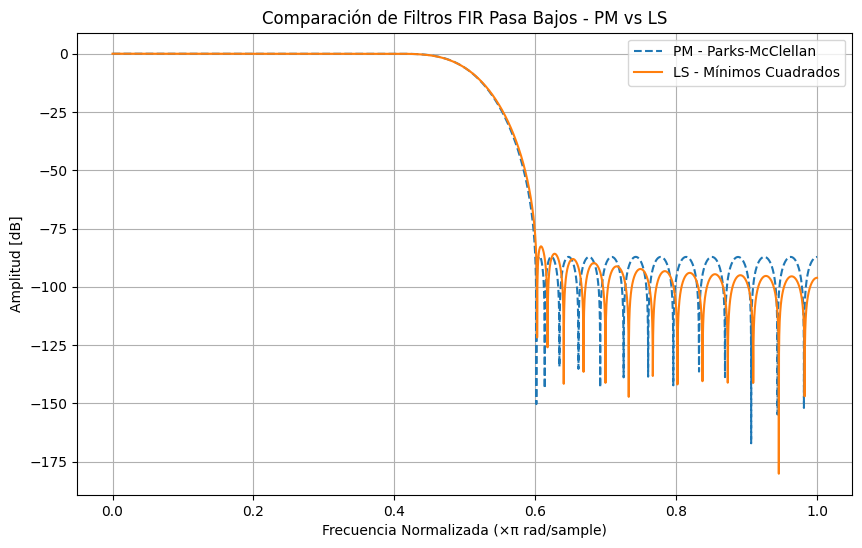

Ripple PM: 0.0008 dB
Ripple LS: 0.0017 dB
Atenuación PM: 86.8343 dB
Atenuación LS: 78.5441 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

from pytc2.filtros_digitales import fir_design_pm, fir_design_ls

# Parámetros comunes del filtro Pasa Bajos
order = 50
fs = 2.0
fpass = 0.4
fstop = 0.6
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fpass, fstop, 1.0]
desired = [1, 1, 0, 0]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='lowpass')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='lowpass')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Pasa Bajos - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[w <= fpass * np.pi])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[w <= fpass * np.pi]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[w >= fstop * np.pi])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[w <= fpass * np.pi])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[w <= fpass * np.pi]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[w >= fstop * np.pi])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


Convergencia exitosa!


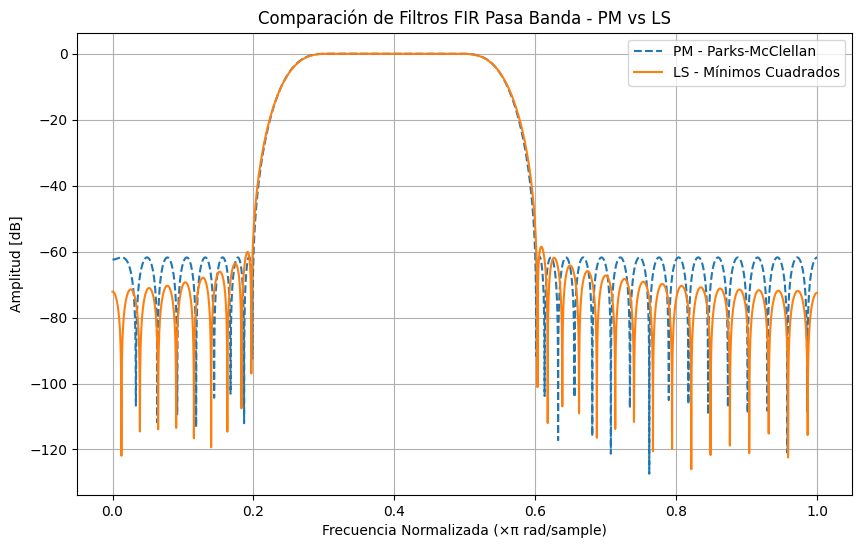

Ripple PM: 0.0143 dB
Ripple LS: 0.0267 dB
Atenuación PM: 61.5855 dB
Atenuación LS: 52.8917 dB


In [2]:
# Parámetros comunes del filtro Pasa Banda
order = 70  # Aumentamos el orden para mejor selectividad
fs = 2.0
fpass1 = 0.3  # Frecuencia de paso inferior
fpass2 = 0.5  # Frecuencia de paso superior
fstop1 = 0.2  # Frecuencia de corte inferior
fstop2 = 0.6  # Frecuencia de corte superior
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fstop1, fpass1, fpass2, fstop2, 1.0]
desired = [0, 0, 1, 1, 0, 0]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Pasa Banda - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[(w <= fstop1*np.pi) | (w >= fstop2*np.pi)])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[(w >= fpass1*np.pi) & (w <= fpass2*np.pi)]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[(w <= fstop1*np.pi) | (w >= fstop2*np.pi)])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


In [3]:
# Parámetros comunes del filtro Pasa Banda
order = 70  # Aumentamos el orden para mejor selectividad
fs = 2.0
fpass1 = 0.3  # Frecuencia de paso inferior
fpass2 = 0.5  # Frecuencia de paso superior
fstop1 = 0.2  # Frecuencia de corte inferior
fstop2 = 0.6  # Frecuencia de corte superior
ripple = 0.5  # dB
attenuation = 40  # dB
lgrid = 16

# Definir las bandas de paso y corte
band_edges = [0, fstop1, fpass1, fpass2, fstop2, 1.0]
desired = [1, 1, 0, 0, 1, 1]

# Desviaciones permisibles en dB
d = np.array([-ripple, -attenuation])  # En dB
d = 10**(d/20)  # Convertir de dB a lineal
d = np.array([(1-d[0]), d[1]])

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type='multiband')

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=8000)
w, h_ls = freqz(b_ls, worN=8000)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_pm)), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, 20 * np.log10(np.abs(h_ls)), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Pasa Banda - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de ripple y atenuación
min_bp_pm = np.min(20 * np.log10(np.abs(h_pm[w <= fpass1*np.pi])))
ripple_pm = np.max(20 * np.log10(np.abs(h_pm[w <= fpass1*np.pi]))) - min_bp_pm
attenuation_pm = min_bp_pm - np.max(20 * np.log10(np.abs(h_pm[np.bitwise_and( w >= fpass1*np.pi, w <= fpass2*np.pi)])))

min_bp_ls = np.min(20 * np.log10(np.abs(h_ls[w <= fpass1*np.pi])))
ripple_ls = np.max(20 * np.log10(np.abs(h_ls[w <= fpass1*np.pi]))) - min_bp_ls
attenuation_ls = min_bp_ls - np.max(20 * np.log10(np.abs(h_ls[ np.bitwise_and( w >= fpass1*np.pi, w <= fpass2*np.pi)])))

print(f'Ripple PM: {ripple_pm:.4f} dB')
print(f'Ripple LS: {ripple_ls:.4f} dB')
print(f'Atenuación PM: {attenuation_pm:.4f} dB')
print(f'Atenuación LS: {attenuation_ls:.4f} dB')


KeyboardInterrupt: 

Como se observa, el diseño no ha sido exitoso y se debe aumentar el orden y volver a intentar el diseño.

Convergencia exitosa!


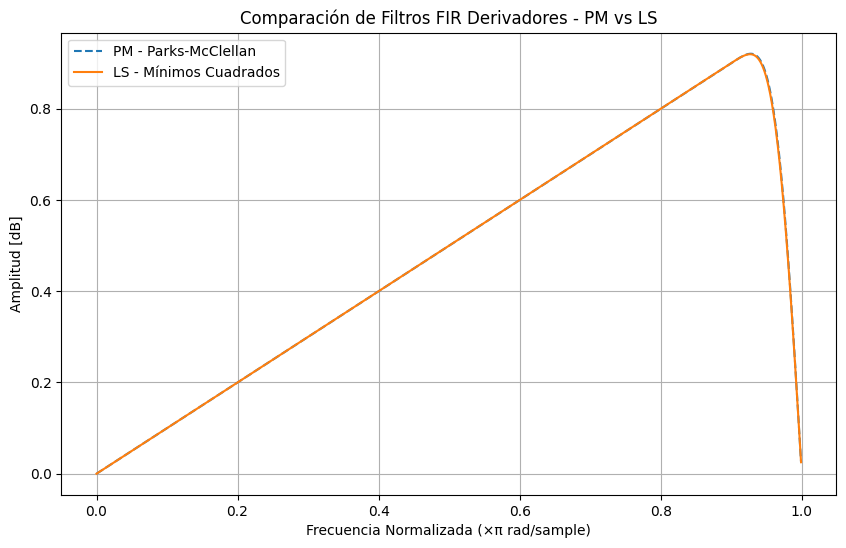

In [15]:
# Parámetros comunes del derivador FIR
Ftype = 'd'  # Derivador
order = 70  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0, 0.9]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [0, 1/np.pi]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Derivadores - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

b_derivador = b_pm
#b_derivador = b_ls

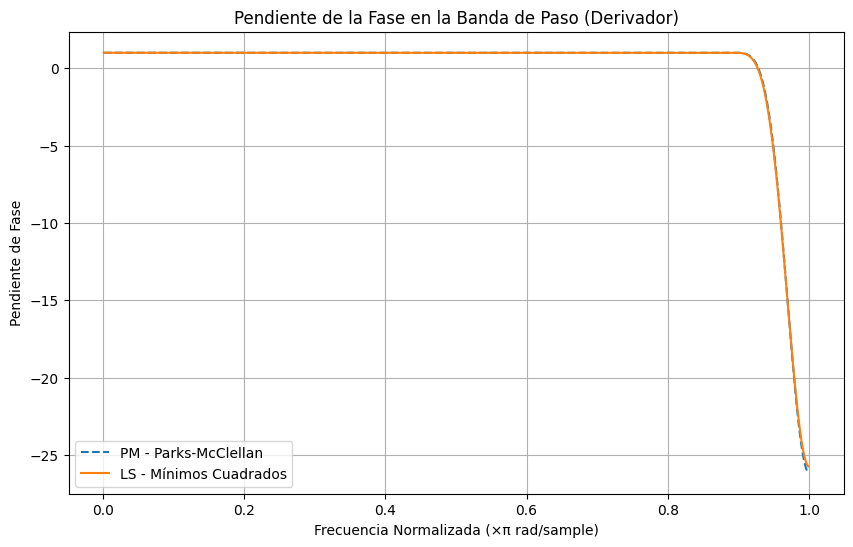

In [5]:
# Análisis de la pendiente en la banda de paso
slope_pm = np.diff(np.abs(h_pm)) / np.diff(w/np.pi)
slope_ls = np.diff(np.abs(h_ls)) / np.diff(w/np.pi)

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.plot(w[1:]/np.pi, slope_pm, label='PM - Parks-McClellan', linestyle='--')
plt.plot(w[1:]/np.pi, slope_ls, label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Pendiente de la Fase en la Banda de Paso (Derivador)')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Pendiente de Fase')
plt.legend()
plt.grid()
plt.show()


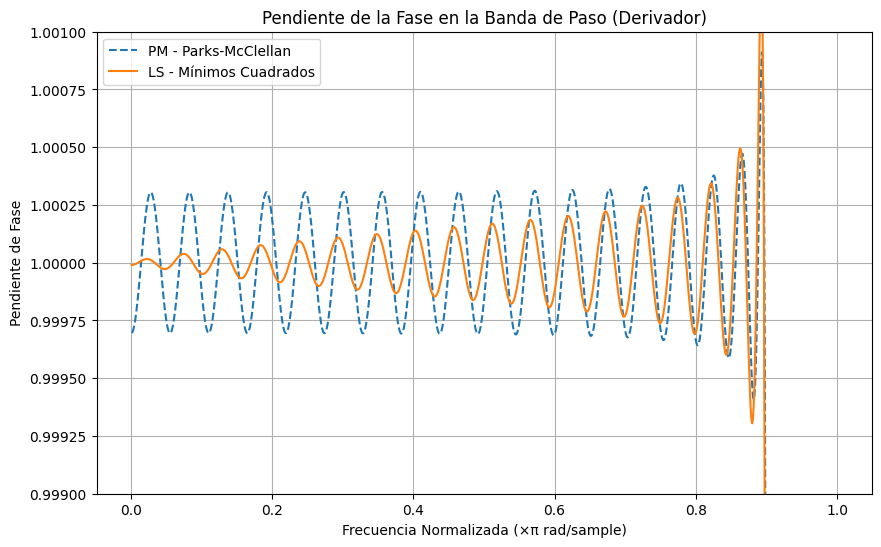

In [6]:
ax.set_ylim([0.999, 1.001])
fig

Convergencia exitosa!


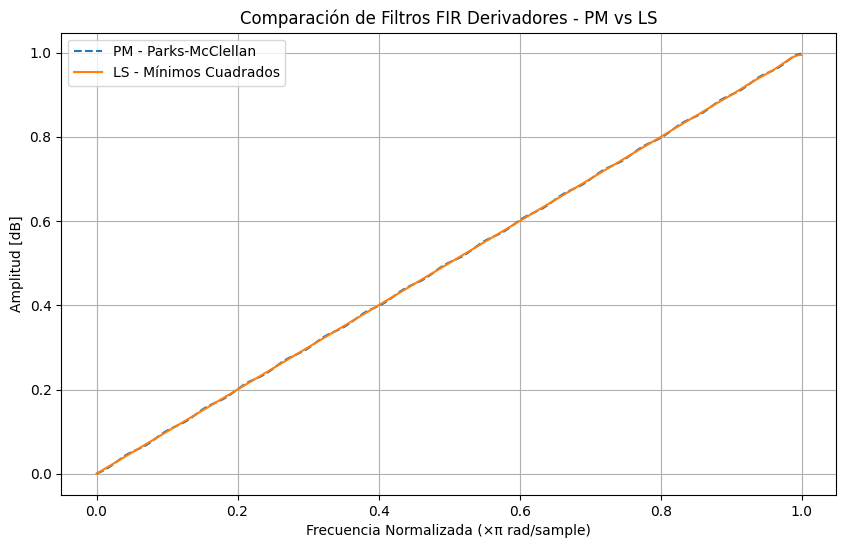

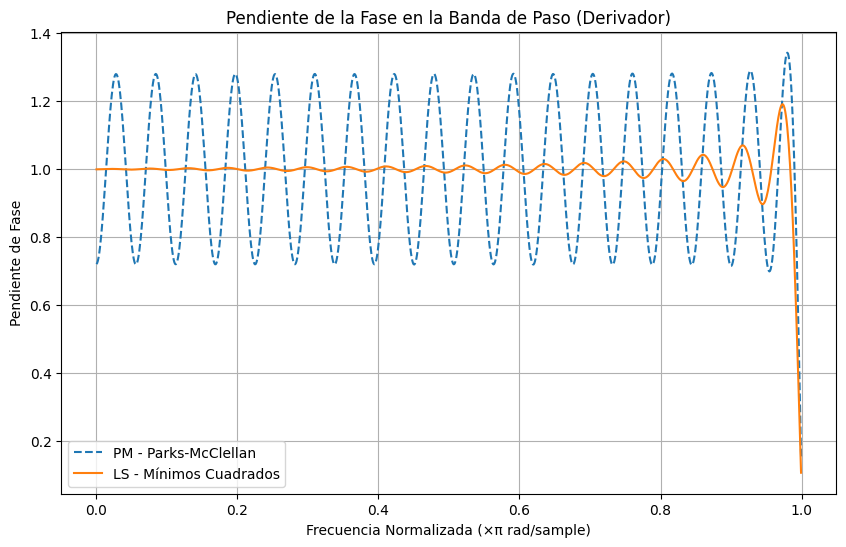

In [7]:
# Parámetros comunes del derivador FIR
Ftype = 'd'  # Derivador
order = 71  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0, 1.0]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [0, 1/np.pi]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR Derivadores - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()

# Análisis de la pendiente en la banda de paso
slope_pm = np.diff(np.abs(h_pm)) / np.diff(w/np.pi)
slope_ls = np.diff(np.abs(h_ls)) / np.diff(w/np.pi)

plt.figure(figsize=(10, 6))
plt.plot(w[1:]/np.pi, slope_pm, label='PM - Parks-McClellan', linestyle='--')
plt.plot(w[1:]/np.pi, slope_ls, label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Pendiente de la Fase en la Banda de Paso (Derivador)')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Pendiente de Fase')
plt.legend()
plt.grid()
plt.show()


Convergencia exitosa!


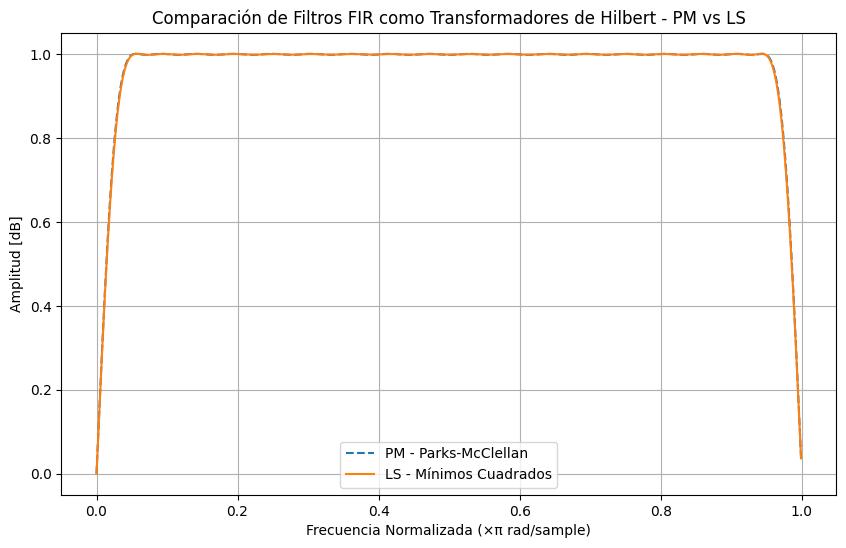

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from pytc2.filtros_digitales import fir_design_pm, fir_design_ls

# Parámetros comunes del derivador FIR
Ftype = 'h'  # Hilbert
order = 70  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0.05, 0.95]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [1., 1.]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR como Transformadores de Hilbert - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()


b_hilbert = b_pm
# b_hilbert = b_ls


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from pytc2.filtros_digitales import fir_design_pm, fir_design_ls

# Parámetros comunes del derivador FIR
Ftype = 'h'  # Hilbert
order = 71  # Orden del filtro (debe ser par para tipo III)
fs = 2.0  # Frecuencia de muestreo
lgrid = 16  # Densidad del grid

# Bandas y especificaciones del derivador
band_edges = [0.05, 1.0]  # Bandas de diseño (en términos de frecuencia normalizada)
desired = [1., 1.]  # Respuesta ideal del derivador (pendiente lineal en la banda de paso)
W = [1., 1.]  # Peso en las bandas

# Diseño del filtro con PM
b_pm, _, _ = fir_design_pm(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Diseño del filtro con LS
b_ls = fir_design_ls(order, band_edges, desired, grid_density=lgrid, fs=fs, filter_type=Ftype)

# Comparar la respuesta en frecuencia de ambos filtros
w, h_pm = freqz(b_pm, worN=1024)
w, h_ls = freqz(b_ls, worN=1024)

# Graficar ambas respuestas
plt.figure(figsize=(10, 6))
plt.plot(w/np.pi, np.abs(h_pm), label='PM - Parks-McClellan', linestyle='--')
plt.plot(w/np.pi, np.abs(h_ls), label='LS - Mínimos Cuadrados', linestyle='-')
plt.title('Comparación de Filtros FIR como Transformadores de Hilbert - PM vs LS')
plt.xlabel('Frecuencia Normalizada (×π rad/sample)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show()



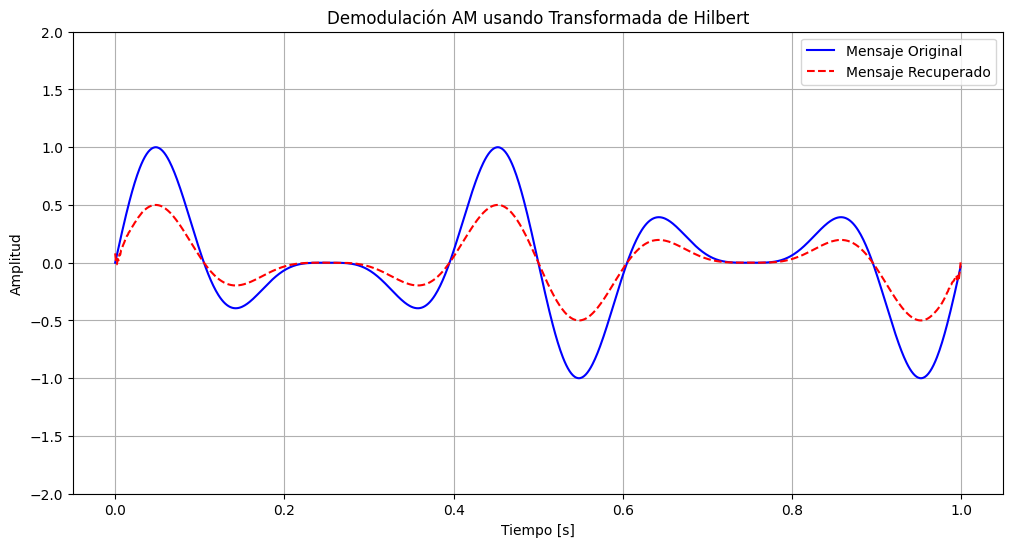

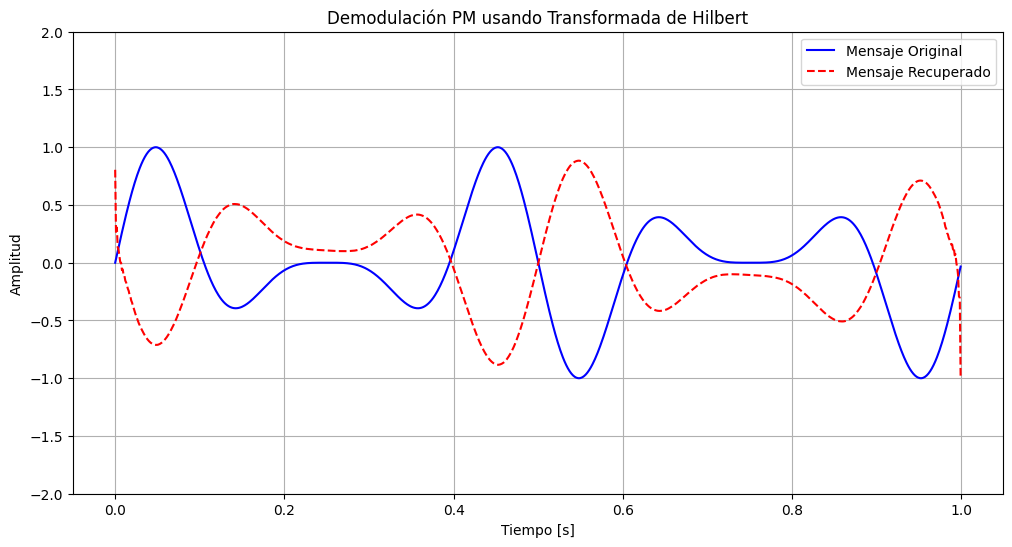

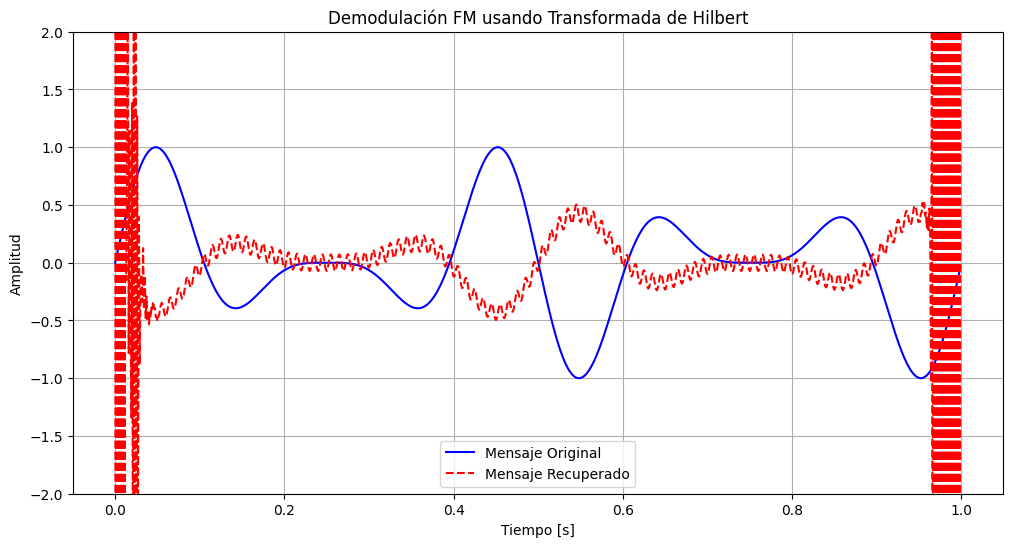

In [18]:

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo
fc = 50  # Frecuencia de la portadora

# Generar señal mensaje
def generar_mensaje(t):
    # Crear una señal mensaje arbitraria normalizada entre -1 y +1
    mensaje = 0.5 * np.sin(2 * np.pi * 5 * t) + \
              0.3 * np.sin(2 * np.pi * 3 * t) + \
              0.2 * np.sin(2 * np.pi * 7 * t)
    return mensaje / np.max(np.abs(mensaje))  # Normalizar

# Generar señal portadora
portadora = np.cos(2 * np.pi * fc * t)

# Generar mensaje
mensaje = generar_mensaje(t)

# Función para aplicar el filtro de Hilbert y obtener la señal analítica
def obtener_senal_analitica(senal, b_hilbert):
    # Aplicar el filtro de Hilbert
    senal_hilbert = np.convolve(senal, b_hilbert, mode='same')
    # Formar la señal analítica
    senal_analitica = senal + 1j * senal_hilbert
    return senal_analitica

# Función para visualizar resultados
def plotear_resultados(t, mensaje_original, mensaje_recuperado, titulo):
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    plt.plot(t, mensaje_original, 'b-', label='Mensaje Original')
    plt.plot(t, mensaje_recuperado, 'r--', label='Mensaje Recuperado')
    ax.set_ylim([-2, 2])
    plt.grid(True)
    plt.legend()
    plt.title(titulo)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()

# 1. Modulación AM
def ejemplo_AM(mensaje, portadora, b_hilbert):
    # Generar señal AM (1 + m(t))*cos(wc*t)
    senal_AM = (1 + mensaje) * portadora
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_AM, b_hilbert)
    
    # Recuperar envolvente
    envolvente = np.abs(senal_analitica)
    
    # Normalizar y centrar la envolvente recuperada
    mensaje_recuperado = (envolvente - np.mean(envolvente)) / (np.max(envolvente) - np.min(envolvente))
    
    return mensaje_recuperado

# 2. Modulación PM
def ejemplo_PM(mensaje, portadora, b_hilbert):
    # Índice de modulación
    beta = np.pi/4
    
    # Generar señal PM cos(wc*t + β*m(t))
    senal_PM = np.cos(2*np.pi*fc*t + beta*mensaje)
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_PM, b_hilbert)
    
    # Recuperar fase instantánea
    fase_inst = np.unwrap(np.angle(senal_analitica))
    
    # Extraer mensaje (eliminar tendencia lineal de la fase)
    tendencia = np.polyfit(t, fase_inst, 1)
    fase_detrend = fase_inst - np.polyval(tendencia, t)
    
    # Normalizar mensaje recuperado
    mensaje_recuperado = fase_detrend / np.max(np.abs(fase_detrend))
    
    return mensaje_recuperado


# 3. Modulación FM (nueva)
def ejemplo_FM(mensaje, portadora, b_hilbert):
    # Índice de modulación FM
    beta = 1.
    
    # Integral del mensaje para la modulación FM
    mensaje_int = np.cumsum(mensaje) / fs
   
    # Generar señal FM cos(wc*t + β*integral(m(t)))
    senal_FM = np.cos(2*np.pi*fc*t + beta*mensaje_int)
 
    # senal_FM = np.cos(2*np.pi*(fc+beta*mensaje)*t)
    
    # Obtener señal analítica
    senal_analitica = obtener_senal_analitica(senal_FM, b_hilbert)
    
    # Obtener fase instantánea
    fase_inst = np.unwrap(np.angle(senal_analitica))
    
    # Derivar la fase para obtener el mensaje
    mensaje_recuperado = np.convolve(fase_inst, b_derivador, mode='same')
    
    # Normalizar
    # mensaje_recuperado = mensaje_recuperado / np.max(np.abs(mensaje_recuperado[]))
    
    parte_centrarl = mensaje_recuperado[100:-100]
    mensaje_recuperado = (mensaje_recuperado - np.mean(parte_centrarl)) / (np.max(parte_centrarl) - np.min(parte_centrarl))
    
    return mensaje_recuperado

# Ejecutar ejemplos
mensaje_recuperado_AM = ejemplo_AM(mensaje, portadora, b_hilbert)
mensaje_recuperado_PM = ejemplo_PM(mensaje, portadora, b_hilbert)
mensaje_recuperado_FM = ejemplo_FM(mensaje, portadora, b_hilbert)

# Visualizar resultados
plotear_resultados(t, mensaje, mensaje_recuperado_AM, 'Demodulación AM usando Transformada de Hilbert')
plotear_resultados(t, mensaje, mensaje_recuperado_PM, 'Demodulación PM usando Transformada de Hilbert')
plotear_resultados(t, mensaje, mensaje_recuperado_FM, 'Demodulación FM usando Transformada de Hilbert')
